<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/04_pytorch_custom_datasets_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 04. PyTorch Custom Datasets Exercises Template

Welcome to the 04. PyTorch Custom Datasets exercise template.

The best way to practice PyTorch code is to write more PyTorch code.

So read the original notebook and try to complete the exercises by writing code where it's required.

Feel free to reference the original resources whenever you need but should practice writing all of the code yourself.

## Resources

1. These exercises/solutions are based on [notebook 04 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/04_pytorch_custom_datasets/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/vsFMF9wqWx0).
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [ ]:
# Check for GPU
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
# Import torch
import torch
from torch import nn

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

2.1.0+cu121


'cpu'

## 1. Our models are underperforming (not fitting the data well). What are 3 methods for preventing underfitting? Write them down and explain each with a sentence.

1. Add more layers to in the architecture
2. Use tranfer learning - already trained model in similar domain
3. Train for long or twear the Learning rate
4. use less regularization


## 2. Recreate the data loading functions we built in [sections 1, 2, 3 and 4 of notebook 04](https://www.learnpytorch.io/04_pytorch_custom_datasets/). You should have train and test `DataLoader`'s ready to use.

In [ ]:
# 1. Get data
import requests
import zipfile
from pathlib import Path
import os

data_path=Path('data/')
image_path = data_path / "pizza_steak_sushi"

if image_path.is_dir():
  print('Directory already exits')
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

    # Download pizza, steak, sushi data
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)

    # Unzip pizza, steak, sushi data
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...")
        zip_ref.extractall(image_path)

Directory already exits


In [ ]:
# 2. Become one with the data
import os
def walk_through_dir(dir_path):
  """Walks through dir_path returning file counts of its contents."""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [ ]:
# Setup train and testing paths
train_path= image_path /'train/'
test_path= image_path /'test/'



data/pizza_steak_sushi/train/sushi/3081701.jpg


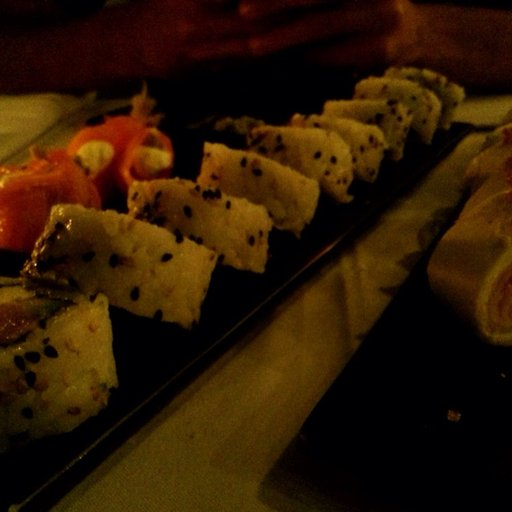

In [ ]:
# Visualize an image
import random
from PIL import Image
import numpy as np

import matplotlib.pyplot as plt

random.seed(42)
image_path_list =list(image_path.glob("*/*/*.jpg"))
random_idx = random.sample(range(len(image_path_list)),1)
random_idx[0]
print(image_path_list[random_idx[0]])
img = Image.open(image_path_list[random_idx[0]])
img



(512, 512, 3)


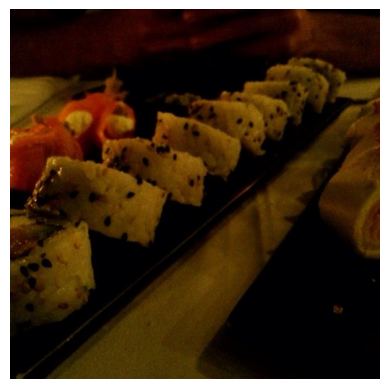

In [ ]:
# Do the image visualization with matplotlib
with Image.open(image_path_list[random_idx[0]]) as img:
  #img_permuted = img.permute(1,2,0)
  img_permuted = np.asarray(img)

  plt.imshow(img_permuted)
  plt.axis('off')
  print(img_permuted.shape)

We've got some images in our folders.

Now we need to make them compatible with PyTorch by:
1. Transform the data into tensors.
2. Turn the tensor data into a `torch.utils.data.Dataset` and later a `torch.utils.data.DataLoader`.

In [ ]:
# 3.1 Transforming data with torchvision.transforms
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

data_transform = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.RandomHorizontalFlip(p = 0.5),
    transforms.ToTensor()

])



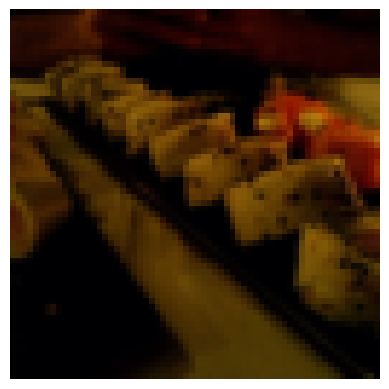

In [ ]:
# Write transform for turning images into tensors
with Image.open(image_path_list[random_idx[0]]) as img:
  image_transformed = data_transform(img).permute(1,2,0)
  plt.imshow(image_transformed)
  plt.axis('off')

torch.Size([64, 64, 3])
torch.Size([64, 64, 3])
torch.Size([64, 64, 3])
torch.Size([64, 64, 3])
torch.Size([64, 64, 3])


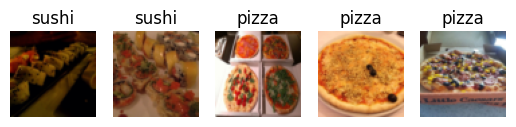

In [ ]:
# Write a function to plot transformed images
def plot_transformed_images(image_path_list, transform, image_count = 5, seed = 42):
  random.seed(seed)
  plt.figure()
  for i in range(image_count):
    random_idx = random.sample(range(len(image_path_list)),1)
    random_image_path = image_path_list[random_idx[0]]
    img = Image.open(random_image_path)
    img = transform(img).permute(1,2,0)
    plt.subplot(1,image_count,i+1)
    plt.imshow(img)
    print(img.shape)
    plt.axis('off')
    plt.title(random_image_path.parent.stem)
plot_transformed_images(image_path_list,data_transform)




### Load image data using `ImageFolder`

In [ ]:
# Use ImageFolder to create dataset(s)
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_path,
                                  transform=data_transform,
                                  target_transform = None
                                  )
test_data = datasets.ImageFolder(root=test_path,
                                  transform = data_transform,
                                  target_transform = None
                                  )

len(train_data), len(test_data)

(225, 75)

In [ ]:
# Get class names as a list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [ ]:
# Can also get class names as a dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [ ]:
# Check the lengths of each dataset
len(train_data), len(test_data)

(225, 75)

In [ ]:
# Turn train and test Datasets into DataLoaders
from torch.utils.data import DataLoader

train_dataloader = DataLoader(dataset=train_data,
                              batch_size = 32,
                              shuffle=True,
                              num_workers =1
                              )

test_dataloader = DataLoader(dataset=test_data,
                              batch_size = 32,
                              shuffle=False,
                              num_workers =1
                              )

In [ ]:
# How many batches of images are in our data loaders?
len(train_dataloader), len(test_dataloader)

(8, 3)

## 3. Recreate `model_0` we built in section 7 of notebook 04.

In [ ]:
from torch import nn
class TinyVGG(nn.Module):
  def __init__(self, input_shape : int, hidden_units: int, output_shape: int)-> None:
    super().__init__()
    self.block1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2,
                     stride = 2)
    )
    self.block2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2,
                     stride = 2)
    )
    self.classifier= nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units*16*16, out_features = output_shape)
    )
  def forward(self,x):
    return self.classifier(self.block2(self.block1(x)))

ccc

TinyVGG(
  (block1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [ ]:
# Install torchinfo if it's not available, import it if it is
try:
    import torchinfo
except:
    !pip install torchinfo
    import torchinfo

from torchinfo import summary
summary(model0, input_size=[1, 3, 64, 64]) # do a test pass through of an example input size


Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 10, 64, 64]           280
│    └─ReLU: 2-2                         [1, 10, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 10, 64, 64]           910
│    └─ReLU: 2-4                         [1, 10, 64, 64]           --
│    └─MaxPool2d: 2-5                    [1, 10, 32, 32]           --
├─Sequential: 1-2                        [1, 10, 16, 16]           --
│    └─Conv2d: 2-6                       [1, 10, 32, 32]           910
│    └─ReLU: 2-7                         [1, 10, 32, 32]           --
│    └─Conv2d: 2-8                       [1, 10, 32, 32]           910
│    └─ReLU: 2-9                         [1, 10, 32, 32]           --
│    └─MaxPool2d: 2-10                   [1, 10, 16, 16]           --
├─Sequentia

In [ ]:
# 1. Get a batch of images and labels from the DataLoader
img_batch, label_batch = next(iter(train_dataloader))

# 2. Get a single image from the batch and unsqueeze the image so its shape fits the model
img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
print(f"Single image shape: {img_single.shape}\n")

# 3. Perform a forward pass on a single image
model0.eval()
with torch.inference_mode():
    pred = model0(img_single.to(device))

# 4. Print out what's happening and convert model logits -> pred probs -> pred label
print(f"Output logits:\n{pred}\n")
print(f"Output prediction probabilities:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n{label_single}")

Single image shape: torch.Size([1, 3, 64, 64])

Output logits:
tensor([[-0.0171, -0.0411, -0.0218]])

Output prediction probabilities:
tensor([[0.3365, 0.3285, 0.3350]])

Output prediction label:
tensor([0])

Actual label:
2


def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
    # Put model in train mode
    model.train()
    
    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0
    
    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc## 4. Create training and testing functions for `model_0`.

In [140]:
"""def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
    # Put model in train mode
    model.train()

    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc"""

def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):

  # Put the model in train mode
  model.train()

  # Setup train loss and train accuracy values
  train_loss, train_acc = 0, 0
  len(dataloader)
  # Loop through data loader and data batches
  for batch, (X,y) in enumerate(dataloader):
    # Send data to target device
    X =X.to(device)
    y=y.to(device)
    # 1. Forward pass
    y_logits = model(X)
    # 2. Calculate and accumulate loss
    loss = loss_fn(y_logits, y)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Calculate and accumualte accuracy metric across all batches
    train_loss +=loss
    #print(train_loss)
    y_pred_class = torch.argmax(torch.softmax(y_logits, dim=1), dim=1)
    #y_pred_class = torch.argmax(torch.softmax(y_logits,dim = 1),dim =1)
    train_acc += (y_pred_class == y).sum().item()/len(y_logits)
  # Adjust metrics to get average loss and average accuracy per batch
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc

In [149]:
"""def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval()

    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0

    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc"""

def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):

  # Put model in eval mode
  model.eval()

  # Setup the test loss and test accuracy values
  test_loss, test_acc = 0, 0

  # Turn on inference context manager
  with torch.inference_mode():
    # Loop through DataLoader batches
    for batch, (X,y) in enumerate(dataloader):
      # Send data to target device
      X,y = X.to(device), y.to(device)

      # 1. Forward pass
      test_pred_logits=model(X)

      # 2. Calculuate and accumulate loss
      loss = loss_fn(test_pred_logits,y)
      test_loss += loss.item()

      # Calculate and accumulate accuracy
      y_pred_class = torch.argmax(torch.softmax(test_pred_logits,dim =1),dim =1)

      test_acc += (y_pred_class == y).sum().item()/len(y)

  # Adjust metrics to get average loss and accuracy per batch
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss, test_acc

In [138]:
from tqdm.auto import tqdm

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):

  # Create results dictionary
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}

  # Loop through the training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
    # Train step
    train_loss, train_acc = train_step(model=model,
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer)
    # Test step
    test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn)

    # Print out what's happening
    print(f"Epoch: {epoch+1} | "
          f"train_loss: {train_loss:.4f} | "
          f"train_acc: {train_acc:.4f} | "
          f"test_loss: {test_loss:.4f} | "
          f"test_acc: {test_acc:.4f}"
    )

    # Update the results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  # Return the results dictionary
  return results

## 5. Try training the model you made in exercise 3 for 5, 20 and 50 epochs, what happens to the results?
* Use `torch.optim.Adam()` with a learning rate of 0.001 as the optimizer.

In [150]:
# Train for 5 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model0.parameters(),
                             lr=0.001)

results_5epochs = train(model=model0,
          train_dataloader=train_dataloader,
          test_dataloader = test_dataloader,
          optimizer = optimizer,
          loss_fn=loss_fn,
          epochs = 5)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.6982 | train_acc: 0.6992 | test_loss: 1.0884 | test_acc: 0.3939
Epoch: 2 | train_loss: 0.7279 | train_acc: 0.6914 | test_loss: 1.0695 | test_acc: 0.4337
Epoch: 3 | train_loss: 0.6884 | train_acc: 0.6992 | test_loss: 0.9988 | test_acc: 0.4754
Epoch: 4 | train_loss: 0.6627 | train_acc: 0.7266 | test_loss: 1.0292 | test_acc: 0.4545
Epoch: 5 | train_loss: 0.6553 | train_acc: 0.7070 | test_loss: 1.0854 | test_acc: 0.3939


In [151]:
# Train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model0.parameters(),
                             lr=0.001)

results_5epochs = train(model=model0,
          train_dataloader=train_dataloader,
          test_dataloader = test_dataloader,
          optimizer = optimizer,
          loss_fn=loss_fn,
          epochs = 20)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.6522 | train_acc: 0.7031 | test_loss: 1.1009 | test_acc: 0.4138
Epoch: 2 | train_loss: 0.6542 | train_acc: 0.7188 | test_loss: 1.0447 | test_acc: 0.4347
Epoch: 3 | train_loss: 0.6504 | train_acc: 0.7422 | test_loss: 1.0637 | test_acc: 0.5057
Epoch: 4 | train_loss: 0.6546 | train_acc: 0.7344 | test_loss: 1.0977 | test_acc: 0.4138
Epoch: 5 | train_loss: 0.6630 | train_acc: 0.7070 | test_loss: 1.1035 | test_acc: 0.4242
Epoch: 6 | train_loss: 0.8753 | train_acc: 0.5820 | test_loss: 1.0801 | test_acc: 0.4640
Epoch: 7 | train_loss: 0.7419 | train_acc: 0.6602 | test_loss: 1.0849 | test_acc: 0.4962
Epoch: 8 | train_loss: 0.6458 | train_acc: 0.7383 | test_loss: 1.1832 | test_acc: 0.3731
Epoch: 9 | train_loss: 0.8681 | train_acc: 0.5664 | test_loss: 1.0497 | test_acc: 0.4858
Epoch: 10 | train_loss: 0.7115 | train_acc: 0.6875 | test_loss: 0.9629 | test_acc: 0.5653
Epoch: 11 | train_loss: 0.6713 | train_acc: 0.7148 | test_loss: 1.0986 | test_acc: 0.3542
Epoch: 12 | train_l

In [152]:
# Train for 50 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model0.parameters(),
                             lr=0.001)

results_5epochs = train(model=model0,
          train_dataloader=train_dataloader,
          test_dataloader = test_dataloader,
          optimizer = optimizer,
          loss_fn=loss_fn,
          epochs = 50)

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.5944 | train_acc: 0.7734 | test_loss: 1.3365 | test_acc: 0.3532
Epoch: 2 | train_loss: 0.6766 | train_acc: 0.7148 | test_loss: 1.0894 | test_acc: 0.4848
Epoch: 3 | train_loss: 0.5751 | train_acc: 0.7695 | test_loss: 1.0532 | test_acc: 0.4858
Epoch: 4 | train_loss: 0.5517 | train_acc: 0.7695 | test_loss: 1.1284 | test_acc: 0.4650
Epoch: 5 | train_loss: 0.5170 | train_acc: 0.7852 | test_loss: 1.1479 | test_acc: 0.4962
Epoch: 6 | train_loss: 0.6757 | train_acc: 0.6641 | test_loss: 1.1791 | test_acc: 0.5057
Epoch: 7 | train_loss: 0.5906 | train_acc: 0.7461 | test_loss: 1.3465 | test_acc: 0.3741
Epoch: 8 | train_loss: 0.6209 | train_acc: 0.7617 | test_loss: 1.1583 | test_acc: 0.4754
Epoch: 9 | train_loss: 0.7574 | train_acc: 0.6406 | test_loss: 1.2626 | test_acc: 0.4441
Epoch: 10 | train_loss: 0.5999 | train_acc: 0.7617 | test_loss: 1.0527 | test_acc: 0.5047
Epoch: 11 | train_loss: 0.6074 | train_acc: 0.7695 | test_loss: 1.2424 | test_acc: 0.4157
Epoch: 12 | train_l

It looks like our model is starting to overfit towards the end (performing far better on the training data than on the testing data).

In order to fix this, we'd have to introduce ways of preventing overfitting.

## 6. Double the number of hidden units in your model and train it for 20 epochs, what happens to the results?

In [155]:
# Double the number of hidden units and train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model1=TinyVGG(input_shape = 3, hidden_units = 20, output_shape = len(train_data.classes))
model1


TinyVGG(
  (block1): Sequential(
    (0): Conv2d(3, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): Sequential(
    (0): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=5120, out_features=3, bias=True)
  )
)

In [156]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model1.parameters(),
                             lr=0.001)

results_5epochs = train(model=model1,
          train_dataloader=train_dataloader,
          test_dataloader = test_dataloader,
          optimizer = optimizer,
          loss_fn=loss_fn,
          epochs = 5)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1035 | train_acc: 0.4297 | test_loss: 1.1063 | test_acc: 0.2604
Epoch: 2 | train_loss: 1.1252 | train_acc: 0.3047 | test_loss: 1.0992 | test_acc: 0.2604
Epoch: 3 | train_loss: 1.0929 | train_acc: 0.3594 | test_loss: 1.0969 | test_acc: 0.2595
Epoch: 4 | train_loss: 1.0994 | train_acc: 0.3516 | test_loss: 1.0774 | test_acc: 0.5331
Epoch: 5 | train_loss: 1.0997 | train_acc: 0.3867 | test_loss: 1.0731 | test_acc: 0.2708


In [157]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model1.parameters(),
                             lr=0.001)

results_5epochs = train(model=model1,
          train_dataloader=train_dataloader,
          test_dataloader = test_dataloader,
          optimizer = optimizer,
          loss_fn=loss_fn,
          epochs = 20)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0391 | train_acc: 0.3984 | test_loss: 1.0526 | test_acc: 0.3636
Epoch: 2 | train_loss: 0.9454 | train_acc: 0.5586 | test_loss: 1.0932 | test_acc: 0.3125
Epoch: 3 | train_loss: 0.8947 | train_acc: 0.6172 | test_loss: 1.0557 | test_acc: 0.3636
Epoch: 4 | train_loss: 0.8838 | train_acc: 0.4805 | test_loss: 0.9301 | test_acc: 0.5767
Epoch: 5 | train_loss: 0.9429 | train_acc: 0.5195 | test_loss: 0.9975 | test_acc: 0.4545
Epoch: 6 | train_loss: 0.8688 | train_acc: 0.6211 | test_loss: 1.1459 | test_acc: 0.3627
Epoch: 7 | train_loss: 0.9461 | train_acc: 0.4883 | test_loss: 1.0697 | test_acc: 0.3939
Epoch: 8 | train_loss: 0.8538 | train_acc: 0.5781 | test_loss: 0.9464 | test_acc: 0.5758
Epoch: 9 | train_loss: 0.8725 | train_acc: 0.5742 | test_loss: 0.9720 | test_acc: 0.5161
Epoch: 10 | train_loss: 1.1716 | train_acc: 0.5898 | test_loss: 0.9852 | test_acc: 0.4536
Epoch: 11 | train_loss: 0.7749 | train_acc: 0.6523 | test_loss: 1.0511 | test_acc: 0.4441
Epoch: 12 | train_l

It looks like the model is still overfitting, even when changing the number of hidden units.

To fix this, we'd have to look at ways to prevent overfitting with our model.

## 7. Double the data you're using with your model from step 6 and train it for 20 epochs, what happens to the results?
* **Note:** You can use the [custom data creation notebook](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/04_custom_data_creation.ipynb) to scale up your Food101 dataset.
* You can also find the [already formatted double data (20% instead of 10% subset) dataset on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/data/pizza_steak_sushi_20_percent.zip), you will need to write download code like in exercise 2 to get it into this notebook.

In [158]:
# Download 20% data for Pizza/Steak/Sushi from GitHub
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi_20_percent"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

# Download pizza, steak, sushi data
with open(data_path / "pizza_steak_sushi_20_percent.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip")
    print("Downloading pizza, steak, sushi 20% data...")
    f.write(request.content)

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi_20_percent.zip", "r") as zip_ref:
    print("Unzipping pizza, steak, sushi 20% data...")
    zip_ref.extractall(image_path)

Did not find data/pizza_steak_sushi_20_percent directory, creating one...
Unzipping pizza, steak, sushi 20% data...


In [159]:
# See how many images we have
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi_20_percent'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi_20_percent/train'.
There are 0 directories and 150 images in 'data/pizza_steak_sushi_20_percent/train/sushi'.
There are 0 directories and 154 images in 'data/pizza_steak_sushi_20_percent/train/pizza'.
There are 0 directories and 146 images in 'data/pizza_steak_sushi_20_percent/train/steak'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi_20_percent/test'.
There are 0 directories and 46 images in 'data/pizza_steak_sushi_20_percent/test/sushi'.
There are 0 directories and 46 images in 'data/pizza_steak_sushi_20_percent/test/pizza'.
There are 0 directories and 58 images in 'data/pizza_steak_sushi_20_percent/test/steak'.


Excellent, we now have double the training and testing images...

In [160]:
# Create the train and test paths
train_data_20_percent_path = image_path / "train"
test_data_20_percent_path = image_path / "test"

train_data_20_percent_path, test_data_20_percent_path

(PosixPath('data/pizza_steak_sushi_20_percent/train'),
 PosixPath('data/pizza_steak_sushi_20_percent/test'))

In [162]:
# Turn the 20 percent datapaths into Datasets and DataLoaders
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader

simple_transform = transforms.Compose([
  transforms.Resize((64, 64)),
  transforms.ToTensor()
])

# Create datasets
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_data_20_percent_path,
                                  transform=simple_transform,
                                  target_transform = None
                                  )
test_data = datasets.ImageFolder(root=test_data_20_percent_path,
                                  transform = data_transform,
                                  target_transform = None
                                  )

len(train_data), len(test_data)

# Create dataloaders


(450, 150)

In [165]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(dataset=train_data,
                              batch_size = 32,
                              shuffle=True,
                              num_workers =1
                              )

test_dataloader = DataLoader(dataset=test_data,
                              batch_size = 32,
                              shuffle=False,
                              num_workers =1
                              )

In [168]:
# Train a model with increased amount of data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model0.parameters(),
                             lr=0.001)

results_5epochs = train(model=model0,
          train_dataloader=train_dataloader,
          test_dataloader = test_dataloader,
          optimizer = optimizer,
          loss_fn=loss_fn,
          epochs = 20)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0971 | train_acc: 0.3125 | test_loss: 1.0792 | test_acc: 0.4920
Epoch: 2 | train_loss: 1.0653 | train_acc: 0.4792 | test_loss: 0.9600 | test_acc: 0.5239
Epoch: 3 | train_loss: 0.9761 | train_acc: 0.5500 | test_loss: 0.9111 | test_acc: 0.5148
Epoch: 4 | train_loss: 0.8868 | train_acc: 0.5646 | test_loss: 0.9540 | test_acc: 0.5773
Epoch: 5 | train_loss: 0.8734 | train_acc: 0.5917 | test_loss: 0.9155 | test_acc: 0.5460
Epoch: 6 | train_loss: 0.8500 | train_acc: 0.6500 | test_loss: 0.8752 | test_acc: 0.6466
Epoch: 7 | train_loss: 0.8063 | train_acc: 0.6479 | test_loss: 0.8775 | test_acc: 0.6261
Epoch: 8 | train_loss: 0.7973 | train_acc: 0.6438 | test_loss: 0.8615 | test_acc: 0.6341
Epoch: 9 | train_loss: 0.7659 | train_acc: 0.6687 | test_loss: 0.8830 | test_acc: 0.5716
Epoch: 10 | train_loss: 0.7441 | train_acc: 0.6896 | test_loss: 0.8622 | test_acc: 0.6216
Epoch: 11 | train_loss: 0.6997 | train_acc: 0.6750 | test_loss: 0.9134 | test_acc: 0.5705
Epoch: 12 | train_l

## 8. Make a prediction on your own custom image of pizza/steak/sushi (you could even download one from the internet) with your trained model from exercise 7 and share your prediction.
* Does the model you trained in exercise 7 get it right?
* If not, what do you think you could do to improve it?

torch.Size([3, 800, 1068])
torch.float32
tranformed image: torch.Size([3, 64, 64])


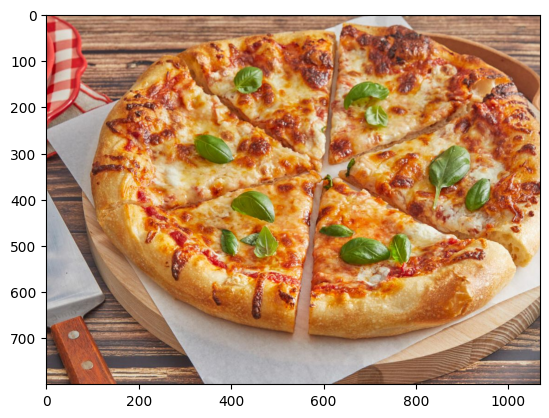

In [193]:
import torchvision
img = torchvision.io.read_image('pizza.jpg')
img=img/255
#img = simple_transform(img)
print(img.shape)
print(img.dtype)
plt.imshow(img.permute(1,2,0))

custome_simple_transform = transforms.Compose([
    transforms.Resize((64,64))
])
custom_image_tranformed = custome_simple_transform(img)
print(f'tranformed image: {custom_image_tranformed.shape}')

model0.eval()
with torch.inference_mode():
  pred = model0(custom_image_tranformed.unsqueeze(dim=0).to(device))



In [195]:

custom_image_pred_probs = torch.softmax(pred, dim=1)
custom_image_pred_label = torch.argmax(custom_image_pred_probs, dim=1)
custom_image_pred_label

tensor([0])

In [199]:
class_names[custom_image_pred_label]


'pizza'